In [43]:
import numpy as np
from pylab import *
import matplotlib

from prettytable import PrettyTable

import datetime




In [7]:
# 2022-11-21 20:00:00

def parsetime(s):
    v=s
    try:
        v=s.decode("utf-8")
    except AttributeError: 
        pass
    return np.datetime64(
        datetime.datetime.strptime(v, '%Y-%m-%d  %H:%M:%S'))

r = parsetime("2022-11-21 20:00:00")

r.astype(np.float64)

1669060800000000.0

 
2.031e-07 x - 4.954e-06
 
1.487e-07 x - 2.35e-06
 
2.131e-07 x - 1.804e-06
 
1.033e-07 x + 8.226e-06
 
1.666e-07 x - 6.551e-06
 
4.6e-07 x + 3.828e-05
 
3.232e-07 x + 3.981e-06
 
1.482e-07 x + 3.293e-06
 
2.647e-07 x + 6.327e-06


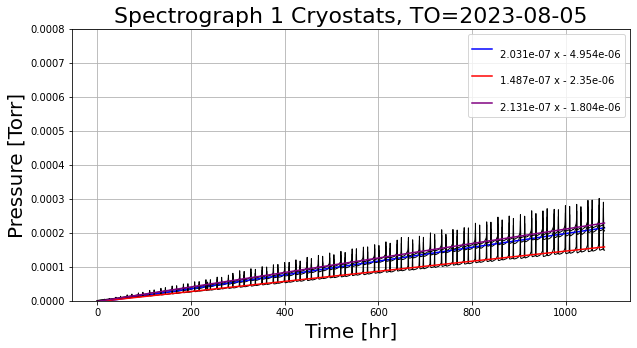

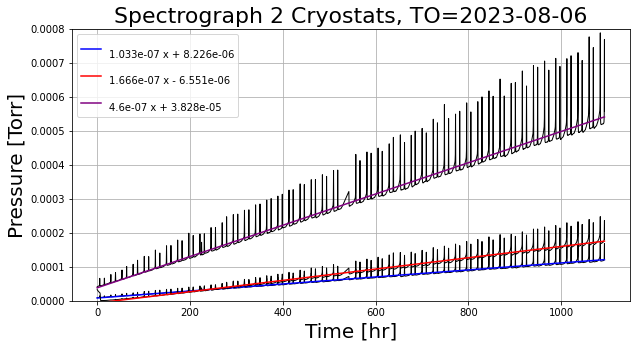

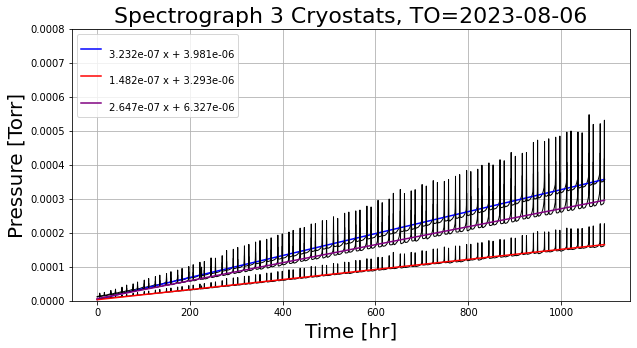

In [31]:

def dofitandplot(roi, hr, P, color='red'):
    """ Plot and fit across a roi(slice) of Pressure versus time (hr)"""
    plot(hr[roi], P[roi], lw=1, color='black')
    ff = np.poly1d(np.polyfit(hr[roi], P[roi], 1))
    line, = plot(hr[roi], ff(hr[roi]), color=color)
    line.set_label(str(ff))
    xlabel("Time [hr]", fontsize=20)
    ylabel("Pressure [Torr]", fontsize=20)
    print(ff)
    
    
    
def go(fname, name="Spectrograph 1 Cryostats, T0=2023-08-06"):
    dat = np.loadtxt(fname, skiprows=2,delimiter=",")

    msec,b,r,z = dat.T
    hr = msec / 1e3 / 60 / 60
    hr -= hr[0]
    
    
    figure(figsize=(10,5))
    title(name, fontsize=22)
    dofitandplot(slice(None,None), hr, b, color='blue')
    dofitandplot(slice(None,None), hr, r, color='red')
    dofitandplot(slice(None,None), hr, z, color='purple')
    legend()
    ylim(0,8e-4)
    grid(True)

go("spec1-explore.csv", "Spectrograph 1 Cryostats, TO=2023-08-05")
go("spec2-2023-08-06.csv", "Spectrograph 2 Cryostats, TO=2023-08-06")
go("spec3-2023-08-06.csv", "Spectrograph 3 Cryostats, TO=2023-08-06")

In [81]:
t = PrettyTable()
def to_lifetime(x):
    """ Torr / hour to days to 1e-3"""
    return "%3i day" % round(1e-3/x/24,0)


t.add_column("Spec 1", list(map(to_lifetime, [2.03e-7, 1.49e-7, 2.13e-7])))
t.add_column("Spec 2", list(map(to_lifetime, [1.03e-7, 1.67e-7, 4.6e-7])))
t.add_column("Spec 3", list(map(to_lifetime, [3.23e-7, 1.48e-7, 2.65e-7])))
res = [[1.03e-7, 1.67e-7, 4.6e-7], [3.23e-7, 1.48e-7, 2.65e-7]]


In [82]:
t

Spec 1,Spec 2,Spec 3
205 day,405 day,129 day
280 day,250 day,282 day
196 day,91 day,157 day
